In [1]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 8.8 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import re
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'text', 'sentiment', 'normalized_text_stemm_emoji']]
df.head()

,created_at,text,sentiment,normalized_text_stemm_emoji
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, fic, silênci, cpi, carl, wizard, retorn..."
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamb, fon, ouv, list, doenç, transmiss, oral,..."
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[defin, vacin, tip, subst, bactér, introduz, c..."
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphon, segur, contr, ]"
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estrag, complet, tud, ]"


In [4]:
emoji_bank = {
  ",:(": "😓",
  ",:)": "😅",
  ",:-(": "😓",
  ",:-)": "😅",
  "0:)": "😇",
  "0:-)": "😇",
  "8-)": "😎",
  ":$": "😒",
  ":'(": "😢",
  ":')": "😂",
  ":'-(": "😢",
  ":'-)": "😂",
  ":'-D": "😂",
  ":'D": "😂",
  ":(": "😦",
  ":)": "😃",
  ":*": "😗",
  ":,'(": "😭",
  ":,'-(": "😭",
  ":,(": "😢",
  ":,)": "😂",
  ":,-(": "😢",
  ":,-)": "😂",
  ":,-D": "😂",
  ":,D": "😂",
  ":-$": "😒",
  ":-(": "😦",
  ":-)": "😃",
  ":-*": "😗",
  ":-/": "😕",
  ":-@": "😡",
  ":-D": "😄",
  ":-o": "😮",
  ":-O": "😮",
  ":-P": "😛",
  ":-S": "😒",
  ":-Z": "😒",
  ":-|": "😐",
  ":/": "😕",
  ":@": "😡",
  ":D": "😄",
  ":o": "😮",
  ":O": "😮",
  ":P": "😛",
  ":s": "😒",
  ":z": "😒",
  ":|": "😐",
  ";(": "😭",
  ";)": "😉",
  ";-(": "😭",
  ";-)": "😉",
  "]:)": "😈",
  "]:-)": "😈",
  "B-)": "😎",
  "o:)": "😇",
  "O:)": "😇",
  "O:-)": "😇",
  "o:-)": "😇",
  "X-)": "😆",
  "x-)": "😆"
}

In [5]:
stopwords_list = ['rt']

In [6]:
import re, string, unicodedata
import nltk
import emoji

def extract_emojis(sample):
    return ' '.join(c for c in sample if c in emoji.EMOJI_DATA).split()

def remove_user_from_text(words):
    return " ".join(filter(lambda x:x[0]!='@', words.split()))

def remove_double_space(sample):
    return " ".join(sample.split())

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return list(map(lambda x: x.lower(), words))

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def clean_text(sample):
    emoji_pat = '[\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]'
    shrink_whitespace_reg = re.compile(r'\s{2,}')
    reg = re.compile(r'({})|[^a-zA-Z]'.format(emoji_pat)) # line a
    result = reg.sub(lambda x: ' {} '.format(x.group(1)) if x.group(1) else ' ', sample)
    return shrink_whitespace_reg.sub(' ', result)

def replace_asci_emoji(sample):
    address = sample
    for k,v in emoji_bank.items():
        address = address.replace(k, v)
    return address

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_list:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_user_from_text(words)
    words = to_lowercase(words.split())
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_asci_emoji(sample)
#     sample = clean_text(sample)
    sample = remove_double_space(sample)
    return normalize(sample)

In [7]:
df['normalized'] = df.apply(lambda x: " ".join(preprocess(x['text'])), axis=1)
df.head()

,created_at,text,sentiment,normalized_text_stemm_emoji,normalized
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, fic, silênci, cpi, carl, wizard, retorn...",após ficar em silêncio na cpi da covid carlos ...
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",para de lamber fone de ouvido lista de doenças...
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[defin, vacin, tip, subst, bactér, introduz, c...",definição de vacina é um tipo de substância ví...
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphon, segur, contr, ]",por que o iphone é mais seguro contra vírus
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estrag, complet, tud, ]",covid tá a estragar completamente tudo


In [8]:
df.groupby('sentiment').size()

sentiment
Negativo    93560
Neutro      58975
Positivo    47465
dtype: int64

In [9]:
df['stem'] = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join(x))

In [10]:
df = df[['created_at', 'sentiment', 'normalized', 'normalized_text_stemm_emoji', 'stem']]
df.head()

,created_at,sentiment,normalized,normalized_text_stemm_emoji,stem
0,2021-07-04 22:17:21,Positivo,após ficar em silêncio na cpi da covid carlos ...,"[após, fic, silênci, cpi, carl, wizard, retorn...",após fic silênci cpi carl wizard retorn est un...
1,2019-11-30 14:35:33,Negativo,para de lamber fone de ouvido lista de doenças...,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",lamb fon ouv list doenç transmiss oral prov am...
2,2022-01-11 12:12:28,Negativo,definição de vacina é um tipo de substância ví...,"[defin, vacin, tip, subst, bactér, introduz, c...",defin vacin tip subst bactér introduz corp pes...
3,2019-11-19 14:52:06,Positivo,por que o iphone é mais seguro contra vírus,"[iphon, segur, contr, ]",iphon segur contr
4,2021-12-28 23:09:10,Negativo,covid tá a estragar completamente tudo,"[estrag, complet, tud, ]",estrag complet tud


In [11]:
one_hot = pd.get_dummies(df['sentiment'])
one_hot

,Negativo,Neutro,Positivo
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
199995,1,0,0
199996,1,0,0
199997,0,1,0
199998,0,1,0


In [12]:
df = df.join(one_hot)

In [13]:
df

,created_at,sentiment,normalized,normalized_text_stemm_emoji,stem,Negativo,Neutro,Positivo
0,2021-07-04 22:17:21,Positivo,após ficar em silêncio na cpi da covid carlos ...,"[após, fic, silênci, cpi, carl, wizard, retorn...",após fic silênci cpi carl wizard retorn est un...,0,0,1
1,2019-11-30 14:35:33,Negativo,para de lamber fone de ouvido lista de doenças...,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",lamb fon ouv list doenç transmiss oral prov am...,1,0,0
2,2022-01-11 12:12:28,Negativo,definição de vacina é um tipo de substância ví...,"[defin, vacin, tip, subst, bactér, introduz, c...",defin vacin tip subst bactér introduz corp pes...,1,0,0
3,2019-11-19 14:52:06,Positivo,por que o iphone é mais seguro contra vírus,"[iphon, segur, contr, ]",iphon segur contr,0,0,1
4,2021-12-28 23:09:10,Negativo,covid tá a estragar completamente tudo,"[estrag, complet, tud, ]",estrag complet tud,1,0,0
...,...,...,...,...,...,...,...,...
199995,2021-03-19 00:21:33,Negativo,mais um brasileiro vítima desse vírus e assass...,"[brasil, vítim, dess, assassin, incompet, dess...",brasil vítim dess assassin incompet dess govern,1,0,0
199996,2020-03-15 23:59:18,Negativo,sinceramente jovens e adultos saudáveis que po...,"[sinc, jov, adult, saud, pod, ter, assintomá, ...",sinc jov adult saud pod ter assintomá cust sos...,1,0,0
199997,2020-10-29 23:03:29,Neutro,a hcq acelera a eliminação do covid19 do organ...,"[hcq, aceler, elimin, organ, dia, uso, result,...",hcq aceler elimin organ dia uso result elimin ...,0,1,0
199998,2020-09-24 23:35:28,Neutro,e o futebol brasileiro discutindo a volta de p...,"[futebol, brasil, discut, volt, públic, estádi, ]",futebol brasil discut volt públic estádi,0,1,0


In [14]:
df = df.sample(n=20000, random_state=42).reset_index(drop=True)

In [15]:
df.groupby('sentiment').size()

sentiment
Negativo    9497
Neutro      5859
Positivo    4644
dtype: int64

In [16]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 26.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 28.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 35.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... don

  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319974 sha256=7151dc5a2b37f20c13436d18c956754278be07b42ecf089039959bbe59359d87
  Stored in directory: /root/.cache/pip/wheels/cd/12/72/68d4a56716592293ce7afe21912cf5b54cf12e939bf0872c01
  Created wheel for keras_bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33514 sha256=25a4f53aba177741819bd06421043ff3f1b996bc0f788a7922db0a8a4c2513b6
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b06f
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12302 sha256=64df0b48f525ddcb18637cb8e5fe66cd9a6f558ee31db00ee5f5b464e636d6f4
  Stored in directory: /root/.cache/pip/wheels/46/68/26/692ed21edd832833c3b0a0e21615bcacd99ca458b3f9ed571f
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3959 sha256=1cb6f919b1eafce0201b99f3574aaf71fcfd06e233f5f4110d2553870c6370fa
  Stored in directory: /r

In [17]:
import ktrain
from ktrain import text

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['normalized'].values, 
    df['sentiment'].values, 
    test_size=0.20, 
    random_state=42,
    stratify=df['sentiment'])

In [19]:
x_train = X_train.tolist()
y_train = y_train.tolist()
x_test = X_test.tolist()
y_test = y_test.tolist()

In [20]:
trn, val, preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=df['sentiment'].unique().tolist(),
                                          preprocess_mode='distilbert',
                                          maxlen=350)

preprocessing train...
language: pt
train sequence lengths:
	mean : 19
	95percentile : 42
	99percentile : 50


/usr/local/lib/python3.7/site-packages/ktrain/utils.py:745: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Is Multi-Label? False
preprocessing test...
language: pt
test sequence lengths:
	mean : 19
	95percentile : 43
	99percentile : 51


task: text classification


In [21]:
model = text.text_classifier('distilbert', train_data=trn, preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [22]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
learner.fit_onecycle(3e-5, 4)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/4
2667/2667 [==============================] - 6856s 3s/step - loss: 0.1058 - accuracy: 0.9658 - val_loss: 0.4477 - val_accuracy: 0.8705
Epoch 2/4
 144/2667 [>.............................] - ETA: 1:46:31 - loss: 0.1114 - accuracy: 0.9606

In [28]:
learner.validate(class_names=preproc.get_classes())

125/125 [==============================] - 87s 699ms/step
              precision    recall  f1-score   support

    Negativo       0.91      0.92      0.91      1899
      Neutro       0.89      0.86      0.87      1172
    Positivo       0.82      0.83      0.83       929

    accuracy                           0.88      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.88      0.88      0.88      4000



array([[1740,   68,   91],
       [  89, 1005,   78],
       [  93,   62,  774]])

In [ ]:
# import pickle
# filename = 'finalized_model_bert.sav'
# pickle.dump(learner, open(filename, 'wb'))

In [40]:
acc = learner.history.history['accuracy']
val_acc = learner.history.history['val_accuracy']
loss = learner.history.history['loss']
val_loss = learner.history.history['val_loss']

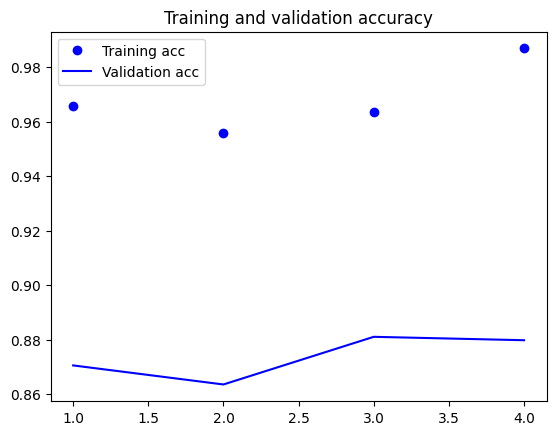

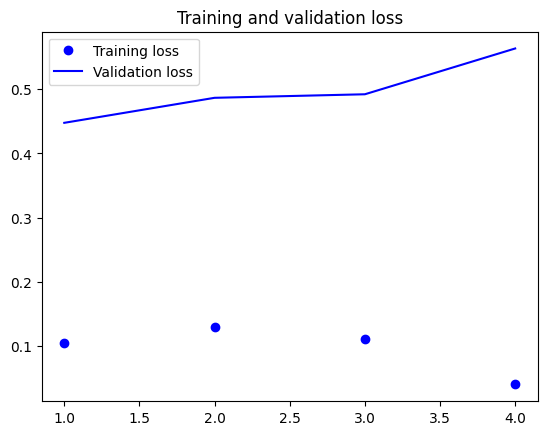

In [41]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()